K-Means Silhouette Score: 0.551191604619592
EM (GMM) Silhouette Score: 0.5011761635067206
K-Means produced better clusters.


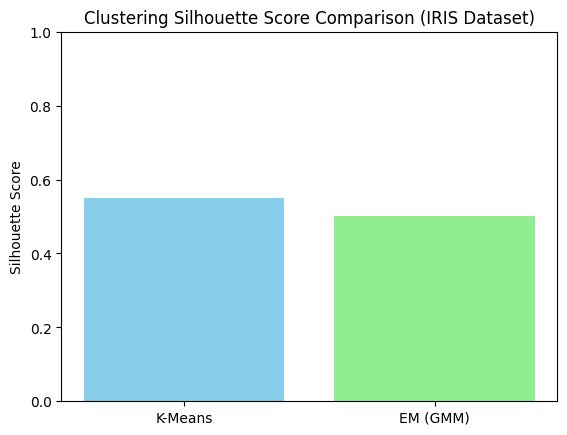

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
labels_kmeans = kmeans.labels_
gmm = GaussianMixture(n_components=k, random_state=42).fit(X)
labels_gmm = gmm.predict(X)
score_kmeans = silhouette_score(X, labels_kmeans)
score_gmm = silhouette_score(X, labels_gmm)
print("K-Means Silhouette Score:", score_kmeans)
print("EM (GMM) Silhouette Score:", score_gmm)
if score_kmeans > score_gmm:
    print("K-Means produced better clusters.")
else:
    print(" EM (GMM) produced better clusters.")
plt.bar(["K-Means", "EM (GMM)"], [score_kmeans, score_gmm],
color=["skyblue", "lightgreen"])
plt.title("Clustering Silhouette Score Comparison (IRIS Dataset)")
plt.ylabel("Silhouette Score")
plt.ylim(0, 1)
plt.show()

In [7]:
import random

# Fitness function: maximize x^2
def fitness(x):
    return x ** 2

# Mutation: flip a random bit with 30% chance
def mutate(x):
    bit = 1 << random.randint(0, 4)  # 5 bits (0–4), for numbers 0–31
    return x ^ bit if random.random() < 0.3 else x

# Initialize population (6 random integers between 0 and 31)
population = [random.randint(0, 31) for _ in range(6)]
generations = 5

for gen in range(generations):
    # Evaluate fitness of each individual
    scores = [fitness(x) for x in population]

    # Select top 2 parents (highest fitness)
    parents = sorted(
        zip(population, scores),
        key=lambda x: x[1],
        reverse=True
    )[:2]
    p1, p2 = parents[0][0], parents[1][0]
    # Single-point crossover at random bit position 1–4
    point = random.randint(1, 4)
    # Bitmask for crossover
    mask = (1 << point) - 1
    # Children (bit-level crossover)
    c1 = (p1 & mask) | (p2 & ~mask)
    c2 = (p2 & mask) | (p1 & ~mask)
    # Mutation
    c1 = mutate(c1)
    c2 = mutate(c2)
    # New population: keep parents + children + 2 random new individuals
    population = [p1, p2, c1, c2] + [random.randint(0, 31) for _ in range(2)]
    print(f"Generation {gen+1}: {population} | Best: {p1} (Fitness={fitness(p1)})")
# Final best solution
best = max(population, key=fitness)
print("\nBest Solution:", best, "| Fitness =", fitness(best))


Generation 1: [31, 25, 25, 23, 19, 10] | Best: 31 (Fitness=961)
Generation 2: [31, 25, 19, 29, 2, 26] | Best: 31 (Fitness=961)
Generation 3: [31, 29, 31, 29, 31, 21] | Best: 31 (Fitness=961)
Generation 4: [31, 31, 31, 31, 30, 23] | Best: 31 (Fitness=961)
Generation 5: [31, 31, 31, 31, 25, 13] | Best: 31 (Fitness=961)

Best Solution: 31 | Fitness = 961


In [11]:
import pandas as pd
from surprise import SVD, Dataset, accuracy
from surprise.model_selection import train_test_split
data = Dataset.load_builtin('ml-100k')
df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])
print("User–Item Rating Matrix:")
print(df.pivot(index='user', columns='item', values='rating'))
train, test = train_test_split(data, test_size=0.2, random_state=42)
model = SVD().fit(train)
print("\nRMSE on Test Data:")
accuracy.rmse(model.test(test))

ModuleNotFoundError: No module named 'surprise'

In [10]:
!pip install scikit-surprise


Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Compiling surprise/similarities.pyx because it changed.
      Compiling surprise/prediction_algorithms/matrix_factorization.pyx because it changed.
      Compiling surprise/prediction_algorithms/optimize_baselines.pyx because it changed.
      Compiling surprise/prediction_algorithms/slope_one.pyx because it changed.
      Compiling surprise/prediction_algorithms/co_clustering.pyx because it changed.
      [1/5] Cythonizing surprise/prediction_algorithms/co_clustering.pyx
      
      Error compiling Cython file:
      ------------------------------------------------------------
      ...
              self.avg_cltr_i = avg_cltr_i
              self.avg_cocltr = avg_cocltr
      
              return self
      
          def compute_averages(self, np.ndarray[np.int_t] cltr_u,
                                                   ^
  

In [2]:
import random, math
from collections import Counter

# Training text
text = "the cat sat on the mat the cat lay on the rug"
words = text.split()

# Build bigrams
ngrams = Counter(zip(words, words[1:]))   # counts of (w_i, w_{i+1})
context = Counter(words[:-1])             # counts of w_i as first word
n=2
print("Learned Bigrams:")
for (a, b), c in ngrams.items():
    print(f"{a} → {b} (count={c})")

# Text generation using bigram model
def generate(start="the", length=8):
    s = [start]
    for _ in range(length):
        # All bigrams where first word == last generated word
        choices = [(b, c) for (a, b), c in ngrams.items() if a == s[-1]]
        if not choices:
            break  # no continuation possible

        words_list, counts = zip(*choices)
        # Sample next word with probability proportional to count
        s.append(random.choices(words_list, counts)[0])
    return " ".join(s)

print("\nGenerated:", generate())

# Perplexity calculation for a sentence
def perplexity(sentence):
    w = sentence.split()
    logp = 0.0
    n = len(w) - 1  # number of bigrams

    for a, b in zip(w, w[1:]):
        bigram_count = ngrams.get((a, b), 0)
        context_count = context.get(a, 0)

        # Add smoothing: if unseen, give a tiny probability
        if bigram_count == 0 or context_count == 0:
            p = 1e-9
        else:
            p = bigram_count / context_count

        logp += math.log(p)

    return math.exp(-logp / n)

print("\nPerplexity:", perplexity("the cat sat on the mat"))


Learned Bigrams:
the → cat (count=2)
cat → sat (count=1)
sat → on (count=1)
on → the (count=2)
the → mat (count=1)
mat → the (count=1)
cat → lay (count=1)
lay → on (count=1)
the → rug (count=1)

Generated: the cat lay on the mat the cat sat

Perplexity: 1.7411011265922482


In [13]:
!python --version


Python 3.10.0


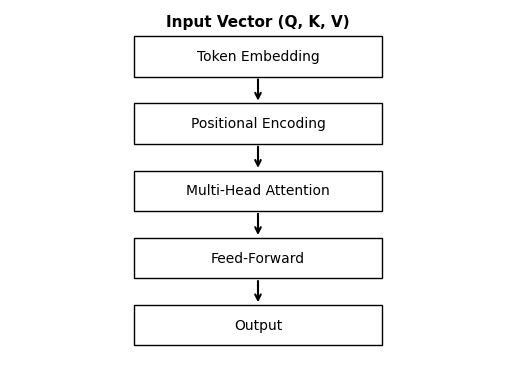

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as p

fig, ax = plt.subplots()

steps = [
    ("Token Embedding", 0.8),
    ("Positional Encoding", 0.6),
    ("Multi-Head Attention", 0.4),
    ("Feed-Forward", 0.2),
    ("Output", 0.0)
]

for label, y in steps:
    ax.add_patch(p.Rectangle((0.25, y), 0.5, 0.12, fill=False))
    ax.text(0.5, y+0.06, label, ha='center', va='center')
ax.text(0.5, 0.95, "Input Vector (Q, K, V)", ha="center", fontsize=11, weight="bold")
for i in range(len(steps)-1):
    _, y1 = steps[i]
    _, y2 = steps[i+1]
    ax.annotate("", xy=(0.5, y2+0.12), xytext=(0.5, y1),
                arrowprops=dict(arrowstyle="->", lw=1.5))

ax.set_xlim(0,1)
ax.set_ylim(-0.1,1)
ax.axis('off')
plt.show()

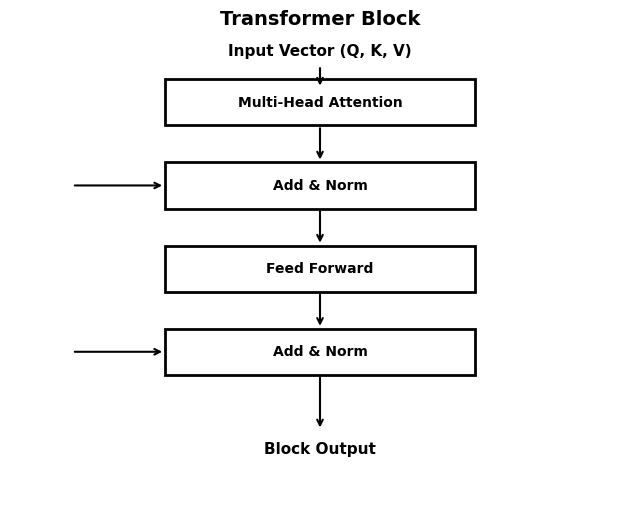

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

blocks = [
    "Multi-Head Attention",
    "Add & Norm",
    "Feed Forward",
    "Add & Norm"
]

y_positions = [0.80, 0.62, 0.44, 0.26]  # shifted slightly down
x = 0.5
width = 0.5
height = 0.1

# Input text (higher)
ax.text(x, 0.95, "Input Vector (Q, K, V)", ha="center", fontsize=11, weight="bold")

# Input arrow with proper spacing
ax.annotate("",
            xy=(x, 0.88),
            xytext=(x, 0.93),
            arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Draw blocks and main arrows
for i, (text, y) in enumerate(zip(blocks, y_positions)):
    rect = plt.Rectangle((x - width/2, y), width, height, fill=False, linewidth=2)
    ax.add_patch(rect)
    ax.text(x, y + height/2, text, ha="center", va="center", weight="bold")

    if i > 0:
        ax.annotate("",
                    xy=(x, y + height),
                    xytext=(x, y_positions[i-1]),
                    arrowprops=dict(arrowstyle="->", linewidth=1.5))

# SIDE ARROWS (Residual connections to Add & Norm)
for i, label in enumerate(blocks):
    if "Add & Norm" in label:
        y_mid = y_positions[i] + height/2
        ax.annotate("",
                    xy=(x - width/2, y_mid),
                    xytext=(x - width/2 - 0.15, y_mid),
                    arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Output arrow
ax.annotate("",
            xy=(x, 0.14),
            xytext=(x, y_positions[-1]),
            arrowprops=dict(arrowstyle="->", linewidth=1.5))
ax.text(x, 0.09, "Block Output", ha="center", fontsize=11, weight="bold")

ax.set_title("Transformer Block", fontsize=14, weight="bold")
ax.axis('off')
plt.show()